date      datetime64[ns]
pm25             float64
pm10             float64
o3               float64
no2              float64
so2              float64
co               float64
center            object
dtype: object


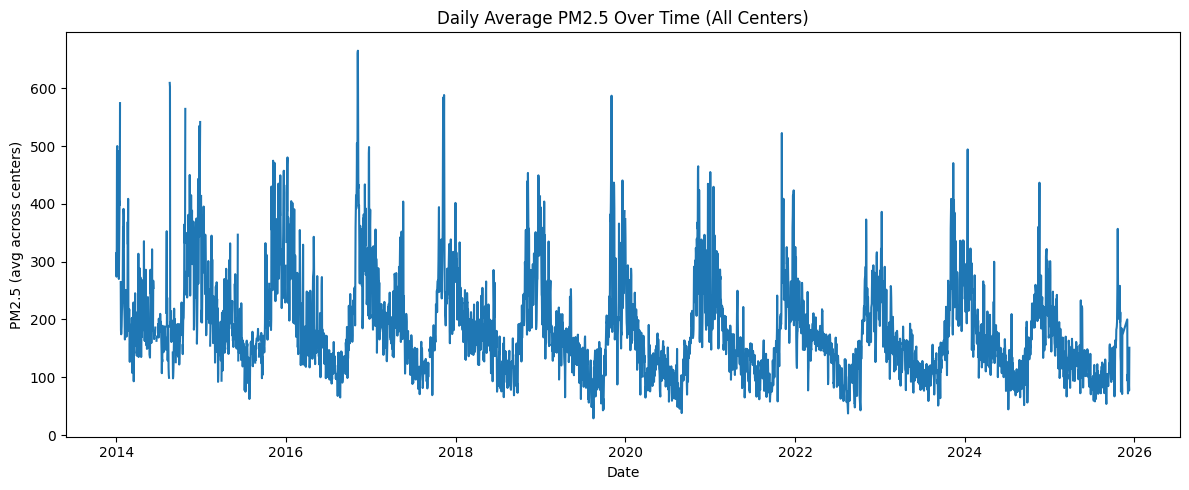

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load processed data
df = pd.read_csv(r"../data/processed/merged_output_final.csv")

# 2) Clean column names
df.columns = df.columns.str.strip()

# 3) Parse dates robustly
df['date'] = pd.to_datetime(
    df['date'],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)

# Drop rows where date couldn't be parsed
df = df.dropna(subset=["date"])

# 4) Convert pollutant columns to numeric
pollutant_cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

for col in pollutant_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# (Optional) Check dtypes
print(df.dtypes)

# 5) Sort by date
df = df.sort_values("date")

# 6) Daily average PM2.5 trend
df_daily = df.groupby('date', as_index=False)['pm25'].mean()

plt.figure(figsize=(12, 5))
plt.plot(df_daily['date'], df_daily['pm25'])
plt.xlabel('Date')
plt.ylabel('PM2.5 (avg across centers)')
plt.title('Daily Average PM2.5 Over Time (All Centers)')
plt.tight_layout()
plt.show()
